In [64]:
#import astropy fits
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy import units as u

IMPORTING THE DATA

In [18]:
catalog_voss_class="VOSS_classifications.fits"
catalog_AllWise="AllWISE.fits"
catalog_Gaia_EDR3="Gaia_EDR3.fits"
catalog_panstarrs="PanSTARRS1DR2.fits"

df_voss=pd.DataFrame()
df_AllWise=pd.DataFrame()
df_Gaia_EDR3=pd.DataFrame()
df_panstarrs=pd.DataFrame()

#why are some columns 2D arrays? I just reshape them to 1D.


with fits.open(catalog_voss_class) as data:
    columns=(data[1].columns)
    for c in columns:
        #reshape the column if it is a 2D array
        if data[1].data[c.name].shape==(2810114, 1):
            datacol=data[1].data[c.name][:,0]
        else:datacol=data[1].data[c.name]
        df_voss[c.name]=datacol

df_voss.head()


,qid,RAd,DECd,objtype,z_spec
0,9411,169.609468,-8.101749,Extended?,NaN
1,9449,170.148583,-1.492678,Galaxy,0.0248
2,9488,169.556347,-10.972102,Extended?,NaN
3,9504,171.006977,-7.590002,,NaN
4,9643,169.973240,-2.670908,,NaN


In [54]:
with fits.open(catalog_AllWise) as data:
    columns=(data[1].columns)
    for c in columns:
        if data[1].data[c.name].shape==(6515767, 1):
            datacol=data[1].data[c.name][:,0]
        else:datacol=data[1].data[c.name]
        df_AllWise[c.name]=datacol 

df_AllWise.describe()

,_id,ra,dec,w1mpro,w1sigmpro,w1snr,w2mpro,w2sigmpro,w2snr,w3mpro,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,pmra,sigpmra,pmdec,sigpmdec,ext_flg
count,6.515767e+06,6.515767e+06,6.515767e+06,6.515764e+06,6.515175e+06,6.515754e+06,6.515753e+06,6.333632e+06,6.515753e+06,6.507869e+06,1.015781e+06,6.507858e+06,6.512763e+06,382790.000000,6.512757e+06,6.515767e+06,6.515767e+06,6.515767e+06,6.515767e+06,6.515767e+06
mean,4.290405e+08,1.949172e+02,-7.631632e+00,1.539898e+01,4.470820e-02,2.908671e+01,1.534876e+01,1.133850e-01,1.633753e+01,1.238958e+01,2.865867e-01,1.305908e+00,8.449800e+00,0.327336,3.261949e-01,1.057520e+01,3.541490e+02,1.049790e+00,3.781991e+02,8.387639e-02
std,1.912489e+08,1.037855e+02,1.281273e+01,1.145639e+00,2.401334e-02,1.029618e+01,1.201645e+00,9.466923e-02,1.131841e+01,5.777821e-01,1.636142e-01,4.292346e+00,5.025855e-01,0.150830,1.927809e+00,3.965750e+02,4.592614e+02,4.439065e+02,4.939273e+02,5.763836e-01
min,2.900000e+01,2.590000e-05,-3.095772e+01,2.101000e+00,1.600000e-02,1.000000e+00,-8.360000e-01,1.400000e-02,-4.690000e+01,-1.728000e+00,9.000000e-03,-2.406000e+02,-3.181000e+00,0.002000,-9.430000e+01,-1.543790e+05,0.000000e+00,-3.746500e+04,0.000000e+00,0.000000e+00
25%,2.808340e+08,1.324313e+02,-1.864064e+01,1.431200e+01,2.900000e-02,2.030000e+01,1.417400e+01,4.500000e-02,6.800000e+00,1.208000e+01,1.250000e-01,-3.000000e-01,8.629000e+00,0.195000,-5.000000e-01,-1.360000e+02,1.290000e+02,-1.590000e+02,1.360000e+02,0.000000e+00
50%,3.847564e+08,2.068402e+02,-7.710351e+00,1.508600e+01,3.600000e-02,2.990000e+01,1.501700e+01,7.600000e-02,1.370000e+01,1.235900e+01,3.030000e-01,5.000000e-01,8.853000e+00,0.351000,1.000000e-01,1.200000e+01,2.440000e+02,5.000000e+00,2.590000e+02,0.000000e+00
75%,6.028363e+08,3.013124e+02,3.325371e+00,1.589500e+01,5.300000e-02,3.770000e+01,1.588700e+01,1.510000e-01,2.390000e+01,1.254600e+01,4.360000e-01,1.400000e+00,9.017000e+00,0.465000,8.000000e-01,1.560000e+02,4.870000e+02,1.580000e+02,5.220000e+02,0.000000e+00
max,7.476340e+08,3.599997e+02,1.500000e+01,1.803700e+01,5.430000e-01,6.990000e+01,1.790500e+01,5.430000e-01,7.510000e+01,1.648800e+01,5.430000e-01,1.210000e+02,9.846000e+00,0.543000,5.698000e+02,3.511500e+04,3.887230e+05,4.772500e+04,4.369460e+05,5.000000e+00


In [59]:
with fits.open(catalog_Gaia_EDR3) as data:
    columns=(data[1].columns)
    for c in columns:
        if data[1].data[c.name].shape==(7804642, 1):
            datacol=data[1].data[c.name][:,0]
        else:datacol=data[1].data[c.name]
        df_Gaia_EDR3[c.name]=datacol

print(df_Gaia_EDR3.describe())

                _id            ra           dec      ra_error     dec_error  \
count  7.804642e+06  7.804642e+06  7.804642e+06  7.804642e+06  7.804642e+06   
mean   6.820919e+07  1.981619e+02 -7.789064e+00  1.358472e+00  1.103513e+00   
std    4.615100e+07  1.025945e+02  1.282131e+01  4.135242e+00  3.434639e+00   
min    2.425000e+03  1.310232e-05 -3.095775e+01  4.717500e-03  4.546260e-03   
25%    2.464445e+07  1.374181e+02 -1.882654e+01  8.823332e-02  7.113870e-02   
50%    5.728576e+07  2.115253e+02 -7.946108e+00  1.881230e-01  1.533790e-01   
75%    1.184901e+08  3.031944e+02  3.148967e+00  4.964717e-01  4.199140e-01   
max    1.349608e+08  3.599999e+02  1.500000e+01  9.997640e+01  9.897530e+01   

          source_id          pmra         pmdec            pm    pmra_error  \
count  7.804642e+06  6.252024e+06  6.252024e+06  6.252024e+06  6.252024e+06   
mean   4.126428e+18 -1.657269e+00 -4.868448e+00  1.100210e+01  2.577872e-01   
std    1.754916e+18  1.167051e+01  9.613176e+00  1.

In [63]:
with fits.open(catalog_panstarrs) as data:
    columns=(data[1].columns)
    for c in columns:
        if data[1].data[c.name].shape==(7810114, 1):
            datacol=data[1].data[c.name][:,0]
        else:datacol=data[1].data[c.name]
        df_panstarrs[c.name]=datacol

df_panstarrs.head()

,_id,objName,objID,objInfoFlag,qualityFlag,raStack,decStack,gPSFMag,gPSFMagErr,rPSFMag,rPSFMagErr,iPSFMag,iPSFMagErr,zPSFMag,zPSFMagErr,yPSFMag,yPSFMagErr
0,3997990,PSO J169.8478+08.2921,117951698478330968,503635968,0,169.847831,8.292097,14.8687,0.000643,14.4920,0.000675,14.2843,0.000345,14.2291,0.000495,14.1723,0.000962
1,4509481,PSO J170.6517-06.4675,100231706516619442,503636096,0,170.651661,-6.467465,15.3123,0.000803,14.6692,0.000565,14.5020,0.000413,14.5836,0.000620,14.4952,0.001363
2,3917028,PSO J169.9170-01.6117,106061699170106347,503635968,0,169.916990,-1.611721,14.9741,0.000591,14.4514,0.000390,14.1906,0.000424,14.1909,0.000512,14.0971,0.000771
3,3846904,PSO J169.5907-09.0501,97141695907460310,503635968,0,169.590742,-9.050050,15.3179,0.000974,14.6199,0.000565,14.2429,0.000393,14.1686,0.000480,14.0111,0.000649
4,3847721,PSO J169.9813-08.8826,97341699813261263,503635968,0,169.981339,-8.882624,16.9869,0.001569,15.7778,0.000683,15.0126,0.000429,14.6715,0.000602,14.5061,0.000839


In [70]:
#print shapes of all dataframes
print("size of voss:",df_voss.shape)
print("size of AllWise:",df_AllWise.shape)
print("size of Gaia_EDR3:",df_Gaia_EDR3.shape)
print("size of panstarrs:",df_panstarrs.shape)

#print which dataframe has the most rows
print("most rows:",max(df_voss.shape[0],df_AllWise.shape[0],df_Gaia_EDR3.shape[0],df_panstarrs.shape[0]))

#print sizes relative to that
print("size of voss:",df_voss.shape[0]/7810114)
print("size of AllWise:",df_AllWise.shape[0]/7810114)
print("size of Gaia_EDR3:",df_Gaia_EDR3.shape[0]/7810114)
print("size of panstarrs:",df_panstarrs.shape[0]/7810114)

size of voss: (2810114, 5)
size of AllWise: (6515767, 22)
size of Gaia_EDR3: (7804642, 23)
size of panstarrs: (7810114, 17)
most rows: 7810114
size of voss: 0.35980447916637326
size of AllWise: 0.8342729696391116
size of Gaia_EDR3: 0.9992993700219996
size of panstarrs: 1.0


### Crossmatching

smiselno manjsi katalog z vecjim. Racunamo, da je vecina virov iz manjsega tudi v vecjem. Ce iscemo v drugi smeri, lahko v določenih primerih najde drug objekt? 
A....a..B.b . A bo matchan z a, a bo matchan z B, B bo matchan z b. Preverjanje ali kaj nekonsistentno, naredi v obratno smer. 

In [76]:
#print both sizes the ratio of the two sizes
print("size of voss/ size of AllWise:",df_voss.shape[0]/df_AllWise.shape[0])

catalog = SkyCoord(ra=df_AllWise.ra.to_numpy()*u.degree, dec=df_AllWise.dec.to_numpy()*u.degree)
c = SkyCoord(ra=df_voss.RAd.to_numpy()*u.degree, dec=df_voss.DECd.to_numpy()*u.degree)
idx_allwise, d2d_allwise, d3d_allwise = c.match_to_catalog_sky(catalog)

#idx_allwise are the indecees of the AllWise dataframe that match the voss dataframe. 
#apply the mask!

size of voss/ size of AllWise: 0.431279080421384


/Users/gregorrih/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


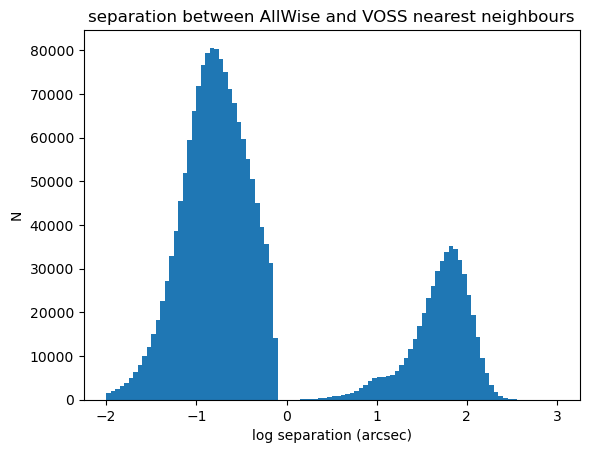

In [86]:
plt.hist(np.log10(d2d_allwise.to(u.arcsec).value),bins=100,range=(-2,3))
plt.xlabel('log separation (arcsec)')
plt.ylabel('N')
plt.title("separation between AllWise and VOSS nearest neighbours")

#save png
plt.savefig('separation_allwise_voss.png')

In [78]:
#do the same for Gaia_EDR3

#print both sizes the ratio of the two sizes
print("size of voss/ size of Gaia_EDR3:",df_voss.shape[0]/df_Gaia_EDR3.shape[0])

catalog = SkyCoord(ra=df_Gaia_EDR3.ra.to_numpy()*u.degree, dec=df_Gaia_EDR3.dec.to_numpy()*u.degree)
c = SkyCoord(ra=df_voss.RAd.to_numpy()*u.degree, dec=df_voss.DECd.to_numpy()*u.degree)
idx_gaia, d2d_gaia, d3d_gaia = c.match_to_catalog_sky(catalog)

size of voss/ size of Gaia_EDR3: 0.3600567457162033


/Users/gregorrih/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


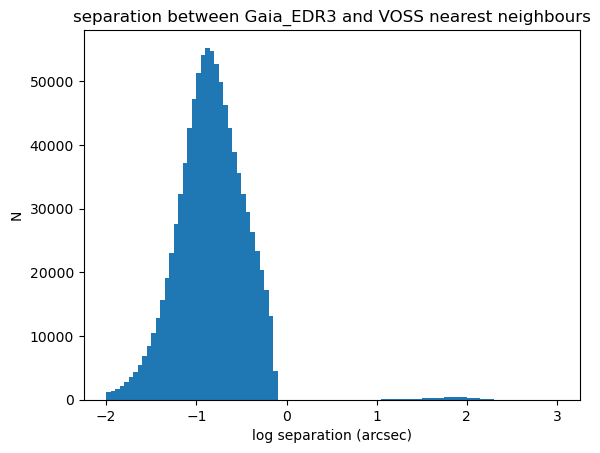

In [87]:
plt.hist(np.log10(d2d_gaia.to(u.arcsec).value),bins=100,range=(-2,3))
plt.xlabel('log separation (arcsec)')
plt.ylabel('N')
plt.title("separation between Gaia_EDR3 and VOSS nearest neighbours")

#save png
plt.savefig('separation_gaia_voss.png')

In [84]:
#do the same for panstarrs

#print both sizes the ratio of the two sizes
print("size of voss/ size of panstarrs:",df_voss.shape[0]/df_panstarrs.shape[0])

catalog = SkyCoord(ra=df_panstarrs.raStack.to_numpy()*u.degree, dec=df_panstarrs.decStack.to_numpy()*u.degree)
c = SkyCoord(ra=df_voss.RAd.to_numpy()*u.degree, dec=df_voss.DECd.to_numpy()*u.degree)
idx_panstarrs, d2d_panstarrs, d3d_panstarrs = c.match_to_catalog_sky(catalog)


size of voss/ size of panstarrs: 0.35980447916637326


/Users/gregorrih/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


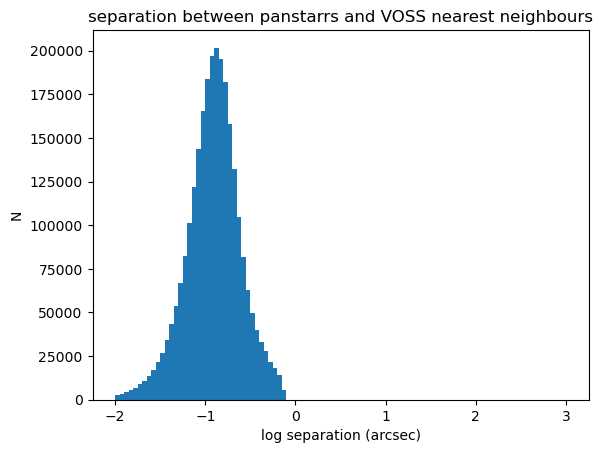

In [88]:
#plot the histograms of the separations
plt.hist(np.log10(d2d_panstarrs.to(u.arcsec).value),bins=100,range=(-2,3))
plt.xlabel('log separation (arcsec)')
plt.ylabel('N')
plt.title("separation between panstarrs and VOSS nearest neighbours")

#save png
plt.savefig('separation_panstarrs_voss.png')

Text(0, 0.5, 'DEC')

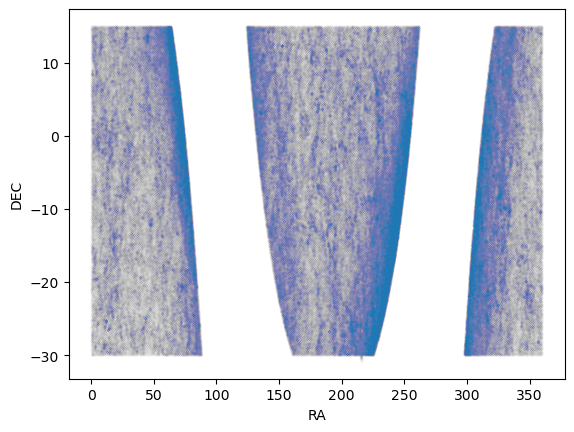

In [57]:
#color code the plot by objtype

plt.scatter(df.RAd,df.DECd,s=0.00001)

plt.xlabel('RA')
plt.ylabel('DEC')